In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4 as nc

import nc_time_axis
import cftime
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
from cmocean import cm as cmo

%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\gian_\\repos')
os.getcwd()

'C:\\Users\\gian_\\repos'

In [3]:
#ds_nc = nc.Dataset(path) #to open the .nc file with netCDF4 

In [4]:
def preprocessing_1dtransect(path, new_time_attr={},dim_drop=None):
    """Step by step I am going to include the different pre-processing options I have been encountering in a function 
    (further on I move it into a class or package)
    Args:
    """
    path = path
    ds_orig = xr.open_dataset(path)
    if dim_drop != None:
        ds.drop_dims(dim_drop)
    ds = ds_orig.squeeze().swap_dims({'MAXT':'TIME'}).rename({
    'LONGITUDE':'lon','LATITUDE':'lat','TIME':'time'})

In [5]:
#define the path
path = '.\\mthesis_gianlucca\\data\\01_raw\\tsg_orchestra\\b1903933.nc'

#open the dataset with the defined path
ds_orig = xr.open_dataset(path) 

#squeeze drops all dimensions with len 0 or 1, drop 'REFMAX' dim as it is not necessary
#ds = ds_orig.squeeze().drop_dims('REFMAX')

#rename coordinates to my standard
#ds = ds.rename({'LATITUDE':'lat','LONGITUDE':'lon','DEPTH':'depth','TIME':'time'}) 

In [5]:
#THIS WAS MY FIRST APPROACH, BUT ACTUALLY IT DOES NOT MAKE SENSE TO DEFINE THE DATASET THIS WAY BECAUSE IT IS NOT REALLY 3D
#Keeping it hastagged because of intersting code

#Reset coords (move coords to variables), set the time coord (so it does not get additional dimensions), rename time.
#ds = ds.reset_coords().set_coords('TIME').rename({'TIME':'time'})

#add new longitude and latitude dimensions using latitude and longitude data from dataset
#ds = ds.expand_dims({'longitude':ds['LONGITUDE'],'latitude':ds['LATITUDE']})

#attach old attributes to newly creates dimensiones (and coordinates)
#ds['latitude'].attrs = ds['LATITUDE'].attrs; ds['longitude'].attrs = ds['LONGITUDE'].attrs

#Replace MAXT with time to create time dimension
#ds = ds.swap_dims({'MAXT':'time'})

#Drop the LATITUDE and LONGITUDE variables (which were coordinates before)
#ds = ds.drop_vars(['LATITUDE', 'LONGITUDE'])

In [6]:
#THIS DOESN'T WORK/ ISN'T NECESARRY: KEEPING BECAUSE OF INTERESTING CODE.

#Sets the coordinates as variables
#ds = ds.reset_coords()

#Creates additional 2 auxiliary dimensions of the same length as the sampling size
#ds = ds.expand_dims({'aux1':len(ds.MAXT),'aux2':len(ds.MAXT)})

#Selects the proper auxiliary dimension for each coordinate. 
#ds['lon'], ds['lat'], ds['time'] = ds['lon'].sel(aux1=0,aux2=0), ds['lat'].sel(aux2=0,aux1=0), ds['time'].sel(aux1=0,aux2=0)

#Defines the coordinates again
#ds = ds.set_coords(['lon','lat','time'])

#Sets the coordinate as dimension
#ds = ds.swap_dims({'aux1':'lon', 'aux2':'lat', 'MAXT':'time'})

In [7]:
#Same as bottom but for the old methodology. Hashtaged out but keeping in case I want to retrieve the old dataset.

#Definition of new time attributes (datetime)
#new_time_attr = {'long_name': 'Chronological DateTime Date',
# 'standard_name': 'time',
# 'ancillary_variables': 'TIME_SEADATANET_QC',
# 'axis': 'T',
# 'valid_min': 0.0,
# 'valid_max': 2500000.0,
# 'sdn_parameter_urn': 'SDN:P01::CJDY1101',
# 'sdn_parameter_name': 'DateTime (chronological)',
# 'sdn_uom_name': 'Days',
# 'sdn_uom_urn': 'SDN:P06::UTAA'}

#Pull out the index (a CFTimeIndex) and use built in to_datetimeindex method.
#datetimeindex = ds.indexes['time'].to_datetimeindex()

#Replace CFTimeIndex with DateTimeIndex:
#ds['time'] = datetimeindex

#Attach new attributes
#ds['time'].attrs = new_time_attr

In [8]:
#Squeeze eliminates dimensions of length 0 and 1. Drop REFMAX as it is not needed. Swap MAXT (count) with TIME 
#to make TIME unique dimension (MAXT is a count a not needed, you can access the same with .isel). Rename coords to
#my standard.
ds = ds_orig.squeeze().drop_dims('REFMAX').swap_dims({'MAXT':'TIME'}).rename({
    'LONGITUDE':'lon','LATITUDE':'lat','TIME':'time'})

#Definition of new time attributes (datetime). Retrieved from original dataset and modified.
new_time_attr = {'long_name': 'Chronological DateTime Date',
 'standard_name': 'time',
 'ancillary_variables': 'TIME_SEADATANET_QC',
 'axis': 'T',
 'valid_min': 0.0,
 'valid_max': 2500000.0,
 'sdn_parameter_urn': 'SDN:P01::CJDY1101',
 'sdn_parameter_name': 'DateTime (chronological)',
 'sdn_uom_name': 'Days',
 'sdn_uom_urn': 'SDN:P06::UTAA'}

#Pull out the index (a CFTimeIndex) and use built in to_datetimeindex method.
datetimeindex = ds.indexes['time'].to_datetimeindex()

#Replace CFTimeIndex with DateTimeIndex:
ds['time'] = datetimeindex

#Attach new attributes
ds['time'].attrs = new_time_attr

C:\Users\gian_\miniconda3\envs\holoviz\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'julian', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.


In [16]:
ds.dro

NameError: name 'ds' is not defined

In [55]:
position = []
for i in range(len(ds.lon)):
    position.append([np.array(ds.lon[i]),np.array(ds.lat[i])])

In [56]:
scatter = hv.Points(position)
scatter

:Points   [x,y]

In [17]:
data_crs = ccrs.PlateCarree()

central_lon = np.median(ds.lon); central_lat = np.median(ds.lon)
projection = ccrs.PlateCarree(central_longitude=central_lon)

fig = plt.figure(figsize=(20, 10))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_lon))
#This sets up GeoAxes instance exposing a variety of other map related methods

ax.scatter(ds.lon, ds.lat, c='red', alpha=1, transform=data_crs, linestyle='--')
#ax.stock_img()
#ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)

plt.show()

NameError: name 'ds' is not defined

In [9]:
type(3.5521)

float

In [5]:
def cruise_map(longitude, latitude, projection = 'PlCar', choose_extent=False, extent=[0,0,0,0]):
    """Visualize the sampling positions as a line transects.
    Args:
        longitude(np.array, pd.array, xr.DataArray): value array of longitude of each position.
        latitude(np.array, pd.array, xr.DataArray): value array of latitude of each position.
        proyection(str): desired proyection. Default = PlCar (PlateCarree). Other = TMerc (Transverse Mercator).
        choose_extent(boolian): True or False if manual extension selection of map is desired. False by default.
        extent(list): list of four floats indicating is this order [min_x, max_x, min_y, max_y]. 
    """    
    import traceback
    
    data_crs = ccrs.PlateCarree()
    
    try:
        central_lon = np.median(longitude); central_lat = np.median(latitude)
        x1, x2, y1, y2 = extent
    except:
        traceback.print_exc()
        
    try:
        if projection == 'PlCar':
            projection = ccrs.PlateCarree(central_longitude=central_lon)
        elif projection == 'TMerc':
            projection = ccrs.TransverseMercator(central_longitude=central_lon, central_latitude=central_lat )
    except:
        traceback.print_exc()

    fig = plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=projection)
     #This sets up GeoAxes instance exposing a variety of other map related methods
        
    if choose_extent == True:
        ax.set_extent(extent)
        
    ax.plot(longitude, latitude, c='red', alpha=1, transform=data_crs, linestyle='--')
    #ax.stock_img()
    #ax.coastlines()
    ax.gridlines(draw_labels=True)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.LAKES)
    ax.add_feature(cartopy.feature.RIVERS)

    
    #plt.savefig('.\\mthesis_gianlucca\\results\\map1.png')
    plt.show()

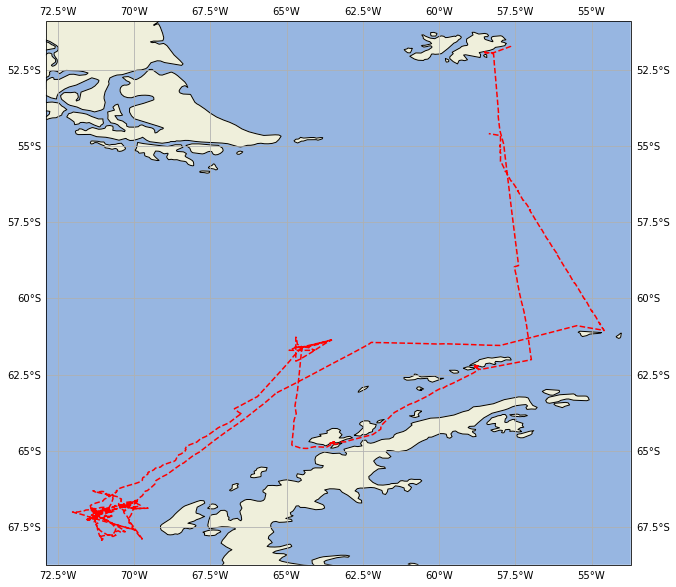

In [13]:
cruise_map(ds.lon, ds.lat)

In [7]:
def select_transect(ds, min_lon, max_lon, min_lat, max_lat, min_time, max_time):
    """Selects the data by latitude, longitude and time.
    Args:
        ds(xr.dataset): the xarray dataset.
        min_lon(float): minimum longitude from -180° to 180°.
        max_lon(float): maximum longitude from -180° to 180°.
        min_lat(float): minimum latitude from -90° to 90°.
        max_lat(float): maximum latitude from -90° to 90°.
        min_time(): starting time in cfttime.Datetimejulian format.
        max_time(): ending time in cfttime.Datetimejulian format."""
    ds_transect = ds.where((ds.LONGITUDE <= -abs(min_lon)) & 
                           (ds.LONGITUDE >= -abs(max_lon)) & 
                           (ds.LATITUDE <= -abs(min_lat)) & 
                           (ds.LATITUDE >= -abs(max_lat)) &
                           (ds.TIME >= min_time) &
                           (ds.TIME <= max_time),
                           drop=True)
        return ds_transect

In [40]:
ds_select = ds.where((ds.latitude <= -52.5) & (ds.latitude >= -60) & (ds.longitude >= -62.5) & (ds.longitude <= -57.5), drop=True)

MemoryError: Unable to allocate 127. GiB for an array with shape (41277, 41277) and data type |S80

In [13]:
temp_hull_1 = ds_select.TEMPHU01.dropna('MAXT')
temp_hull_2 = ds_select.TEMPHU02.dropna('MAXT')
temp_tsg = ds_select.TMESSG01.dropna('MAXT')

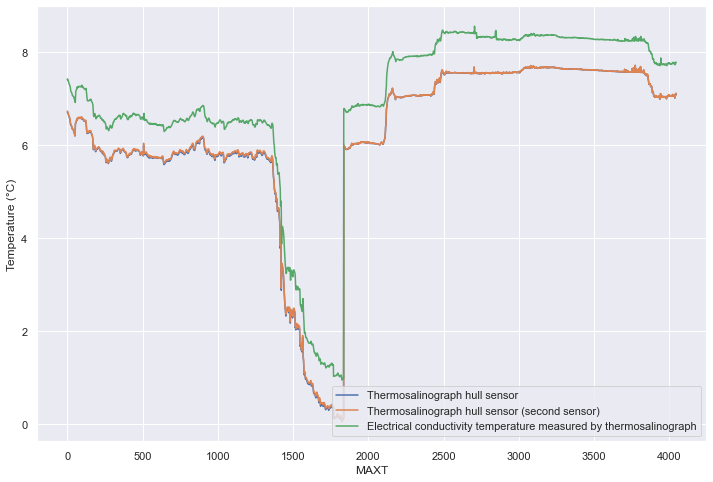

In [18]:
 sns.set()

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y=temp_hull_1, x=temp_hull_1['MAXT'], label='Thermosalinograph hull sensor')
sns.lineplot(y=temp_hull_2, x=temp_hull_2['MAXT'], label='Thermosalinograph hull sensor (second sensor)')
sns.lineplot(y=temp_tsg, x=temp_tsg['MAXT'], label='Electrical conductivity temperature measured by thermosalinograph')

ax.set(ylabel='Temperature (°C)')
ax.legend(loc='lower right')

In [30]:
temp_dif = ds.TMESSG01 - ds.TEMPHU01

<AxesSubplot:xlabel='MAXT'>

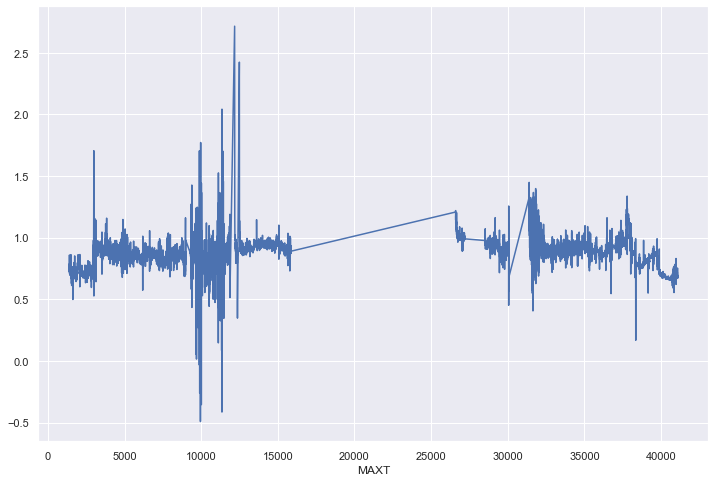

In [33]:
sns.set()

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y=temp_dif, x=temp_dif['MAXT'])

In [31]:
temp_dif.plot

In [28]:
ds

<xarray.Dataset>
Dimensions:                 (MAXT: 41277)
Coordinates:
    LATITUDE                (MAXT) float64 -51.72 -51.72 -51.72 ... -54.6 -54.59
    LONGITUDE               (MAXT) float64 -57.65 -57.65 ... -58.36 -58.37
    DEPTH                   (MAXT) float32 6.5 6.5 6.5 6.5 ... 6.5 6.5 6.5 6.5
    TIME                    (MAXT) object 2017-11-08 00:00:00 ... 2017-12-06 ...
Dimensions without coordinates: MAXT
Data variables: (12/25)
    SDN_CRUISE              |S80 b'JR17001 (ORCHESTRA)'
    crs                     int32 0
    SDN_EDMO_CODE           int32 43
    SDN_STATION             |S80 b'JR17001_PROD_SURF'
    SDN_LOCAL_CDI_ID        |S80 b'1903933'
    SDN_BOT_DEPTH           (MAXT) float32 nan nan nan nan ... nan nan nan nan
    ...                      ...
    TEMPHU01_SEADATANET_QC  (MAXT) float32 nan nan nan nan ... nan nan nan nan
    TEMPHU01                (MAXT) float32 nan nan nan nan ... nan nan nan nan
    TEMPHU02_SEADATANET_QC  (MAXT) float32 nan nan nan nan ... nan nan nan nan
    TEMPHU02                (MAXT) float32 nan nan nan nan ... nan nan nan nan
    TMESSG01_SEADATANET_QC  (MAXT) float32 nan nan nan nan ... nan nan nan nan
    TMESSG01                (MAXT) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    date_update:  2020-07-31T01:05:54+0100
    comment:      
    Conventions:  SeaDataNet_1.0 CF-1.6
    featureType:  trajectory
    title:        SeaDataNet NETCDF TRAJECTORY Climate Forecast 1.6 - GENERAT...

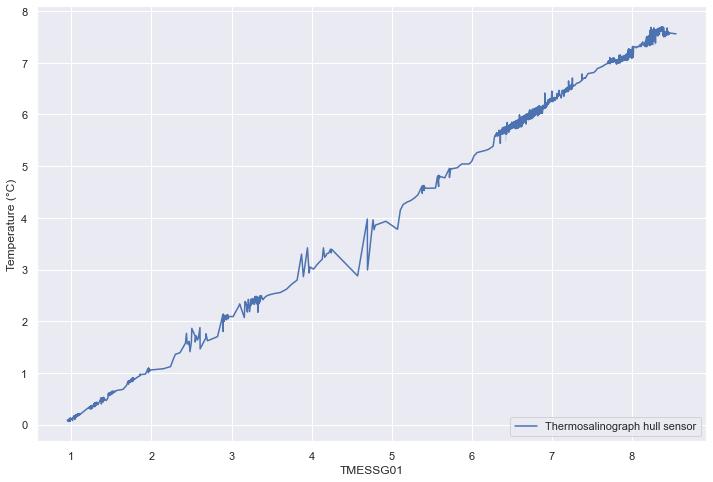

In [19]:
sns.set()

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y=temp_hull_1, x=temp_tsg, label='Thermosalinograph hull sensor')

ax.set(ylabel='Temperature (°C)')
ax.legend(loc='lower right')

PSALSG01 (Dimensionless) = Practical salinity of the water body by thermosalinograph and computation using UNESCO 1983 algorithm and calibration against independent measurements

PASLSU01 (Dimensionless) = Practical salinity of the water body by thermosalinograph and computation using UNESCO 1983 algorithm and NO calibration against independent measurements

TEMPHU01 (Degrees Celsius) = Temperature of the water body by thermosalinograph hull sensor and NO verification against independent measurements

TEMPHU02 (Degrees Celsius) = Temperature of the water body by thermosalinograph hull sensor (second sensor) and NO verification against independent measurements

TMESSG01 (Degrees Celsius) = Temperature of electrical conductivity measurement by thermosalinograph

In [23]:
orchestra_tsg_ds['MAXT'] 

<xarray.DataArray 'MAXT' (MAXT: 41277)>
array([    0,     1,     2, ..., 41274, 41275, 41276], dtype=int64)
Dimensions without coordinates: MAXT

In [18]:
lon = np.array(orchestra_tsg_ds.LONGITUDE)
lat = np.array(orchestra_tsg_ds.LATITUDE)

In [17]:
lon

array([[-57.65376663, -57.65382767, -57.65382385, ..., -58.36009979,
        -58.36487961, -58.3693428 ]])

ValueError: Image "Topo" and resolution "low" are not present in the user background image metadata in directory "C:\Users\gian_\anaconda3\lib\site-packages\cartopy\data\raster\natural_earth"

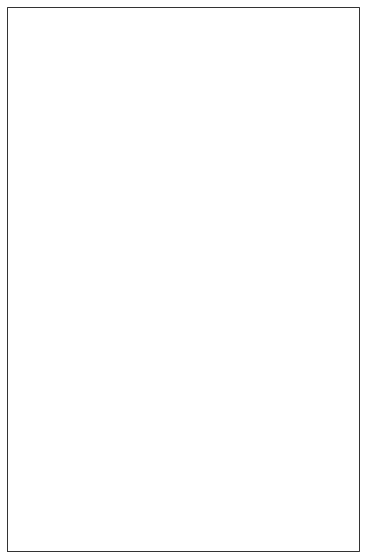

In [56]:
TransMercDrake = ccrs.TransverseMercator(central_longitude=-65.0,central_latitude=-60.0,approx=False)

fig = plt.figure(figsize=(20, 10))

ax = plt.axes(projection=TransMercDrake)
ax.set_extent([-75,-55,-70,-50])

#This sets up GeoAxes instance exposing a variety of other map related methods
ax.background_img(name='BM', resolution='high')
ax.coastlines()
ax.gridlines(draw_labels=True)
#plt.plot(lon,lat,
 #       color='red', linewidth=3,
  #      transform=ccrs.PlateCarree(),
        #)

plt.show()

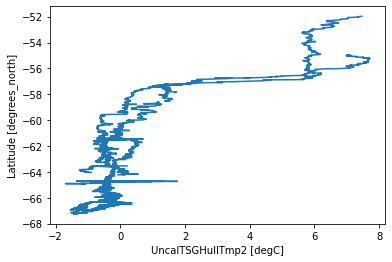

In [24]:
orchestra_tsg_ds.TEMPHU02.plot(y="LATITUDE")

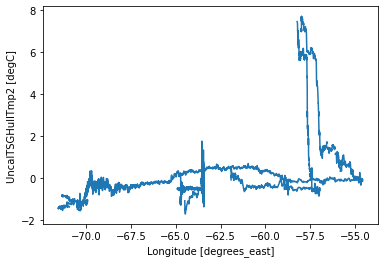

In [26]:
orchestra_tsg_ds.TEMPHU02.plot(x="LONGITUDE")

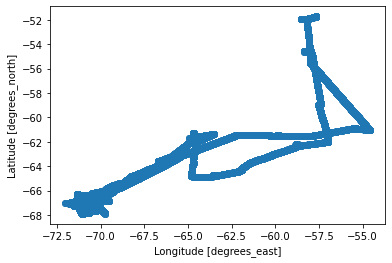

In [29]:
orchestra_tsg_ds.plot.scatter(x="LONGITUDE",y="LATITUDE")